# Product Range Analysis
## IV. Product Category Analysis



## Table of Contents

- [Project Overview](#overview)
- [Product Category Analysis](#category_analysis)

<a id='overview'></a>
## Overview

You are given a sales transactions history data of an online store that sells household goods. Perform product range and customer segmentation analysis to help the stakeholders identify the top performing products, categories, and customers. 


### Business Problem
Based on the sales transactions data:
1. Identify the top performers: top customer, top product, and top category
2. Identify the customer segments based on RFM
3. Did higher-priced products contribute to higher sales than the lower-priced products?
4. Were sales higher during Christmas season (December) as compared to other months?


### Datasets and Attributes

The original dataset contains **541909** transaction records from **2018-11-29 to 2019-12-07**. It has 7 attributes:

- **InvoiceNo**: Invoice reference number uniquely assigned for each transaction. If the InvoiceNo starts with 'C', it indicates a cancellation
- **StockCode**: Product or item code uniquely assigned to each distinct product
- **Description**: Product or item name
- **Quantity**: The quantities for each product or item per transaction
- **InvoiceDate**: Invoice date and time, the day and time the transaction was generated by the system
- **UnitPrice**: Product price per unit
- **CustomerID**: Customer reference number uniquely assigned to each customer


### Project Scope
1. Data Preprocessing 
2. Exploratory Data Analysis
3. Customer Segmentation based on RFM Metrics (using percentile ranking and K-means clustering)
4. Product Categorization & Product Category Analysis
5. Statistical Hypotheses
6. Insights
7. Dashboard

<a id='category_analysis'></a>
### Product Category Analysis

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load the dataset

sales_category = pd.read_pickle("C:/Users/offic/OneDrive/Desktop/product data analysis/sales_category.pkl")
sales_category.head()

,InvoiceNo,StockCode,Description,Category,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,Wicker items,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,2018-11,Thursday,8
1,536365,71053,WHITE METAL LANTERN,Tea light holders,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,Tea light holders,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,2018-11,Thursday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,Tea light holders,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,Wicker items,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8


In [12]:
sales_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533652 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    533652 non-null  object        
 1   StockCode    533652 non-null  object        
 2   Description  533652 non-null  object        
 3   Category     533652 non-null  object        
 4   Quantity     533652 non-null  int64         
 5   InvoiceDate  533652 non-null  datetime64[ns]
 6   UnitPrice    533652 non-null  float64       
 7   CustomerID   399689 non-null  object        
 8   LineTotal    533652 non-null  float64       
 9   Date         533652 non-null  object        
 10  Period       533652 non-null  period[M]     
 11  Day          533652 non-null  object        
 12  Hour         533652 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7), period[M](1)
memory usage: 55.0+ MB


### Sales performance per category

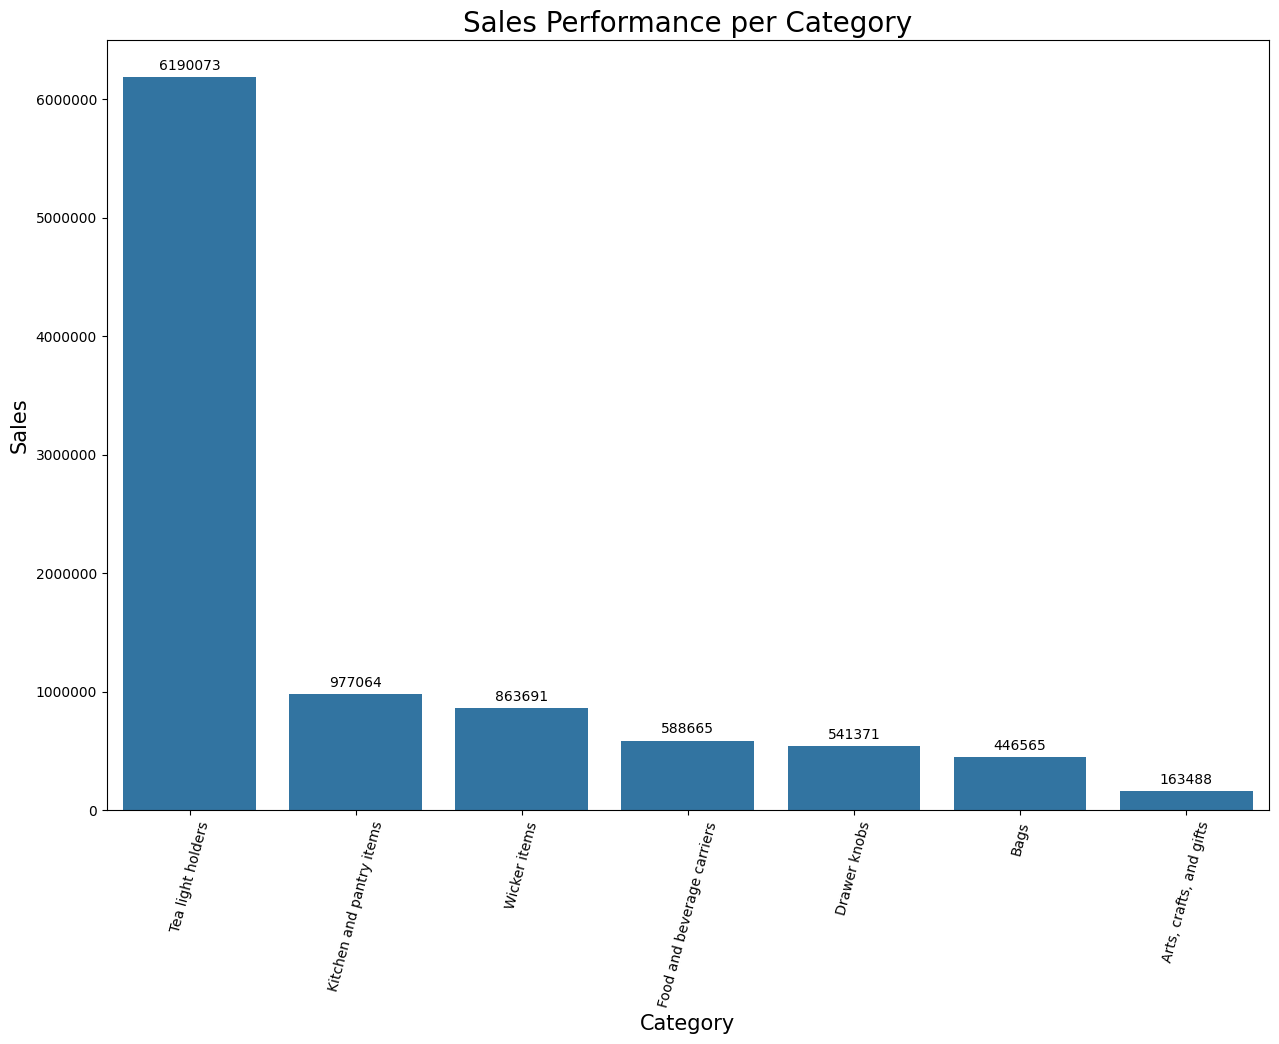

In [13]:
# Performance of each category based on total sales

sales_perf_cat = sales_category.groupby(['Category'])['LineTotal'].sum().sort_values(ascending=False)

plt.figure(figsize = [15, 10])
base_color = sns.color_palette()[0]

ax = sns.barplot(x=sales_perf_cat.index, y=sales_perf_cat.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # fmt annotates bar plots with labels without scientific notation
ax.ticklabel_format(style='plain', axis="y") # plain turns off scientific notation

plt.title('Sales Performance per Category', size = 20)
plt.xlabel('Category', size = 15)
plt.ylabel('Sales', size = 15)

plt.xticks(rotation = 75)
plt.show;

### Best performing category sales over time
The best performing category is Arts, crafts, and gifts	with a proportion of 66.24% to total sales

In [14]:
# Proportion of Arts, crafts, and gifts category to total sales

best_perf_cat = (sales_perf_cat[0]/sales_category['LineTotal'].sum()) * 100
print('The proportion of sales of Arts, crafts, and gifts category to total sales is ', \
      "{:.2f}".format(best_perf_cat), '%')

The proportion of sales of Arts, crafts, and gifts category to total sales is  63.35 %


In [15]:
# Arts, crafts, and gifts category monthly sales

arts_crafts_gifts = sales_category[sales_category['Category'] == 'Arts, crafts, and gifts']

arts_crafts_gifts.groupby(['Period'])['LineTotal'].sum().reset_index()

,Period,LineTotal
0,2018-11,1946.23
1,2018-12,9162.52
2,2019-01,9346.21
3,2019-02,7991.51
4,2019-03,8120.37
5,2019-04,5568.13
6,2019-05,15493.84
7,2019-06,11840.34
8,2019-07,12853.77
9,2019-08,17394.71


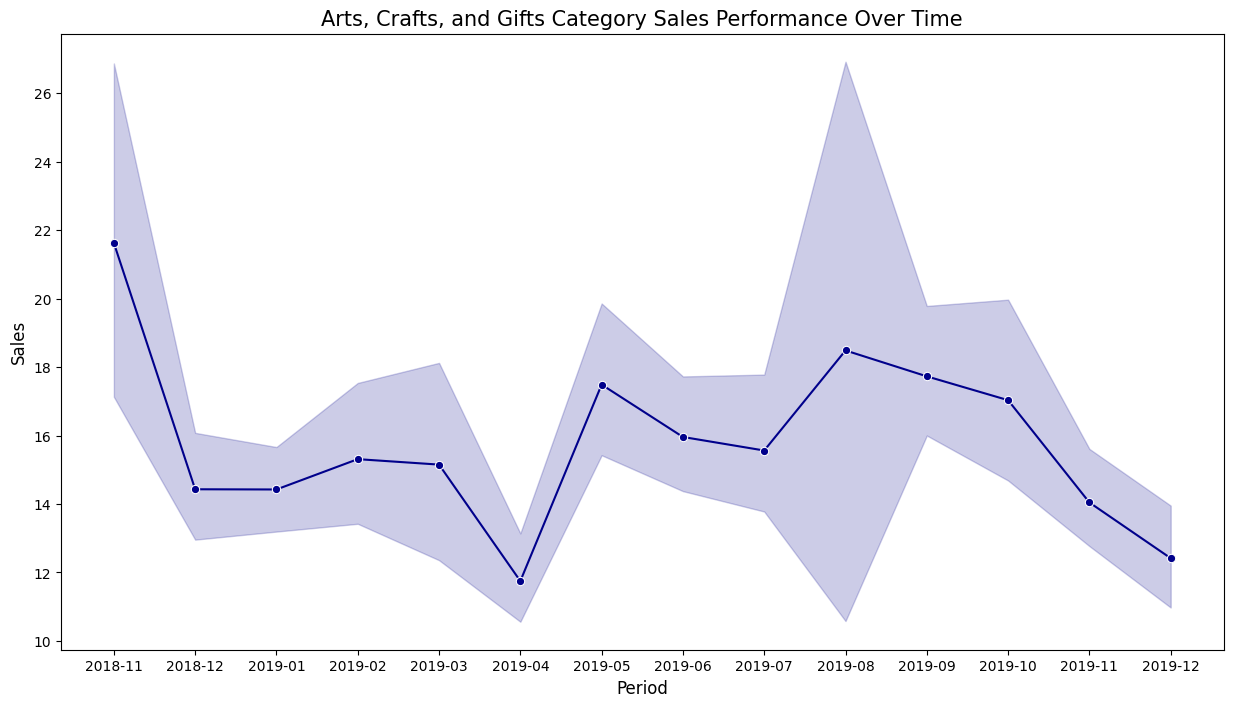

In [16]:
# Visualize Arts, crafts, and gifts Category Performance Over Time

plt.figure(figsize = [15, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=arts_crafts_gifts, x = arts_crafts_gifts['Period'].astype(str), 
             y = 'LineTotal', color = 'darkblue', marker = 'o')

plt.title('Arts, Crafts, and Gifts Category Sales Performance Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales', size = 12)
plt.show()

### Top 10 customers with largest spend on Arts, crafts, and gifts  category

In [17]:
# Top 10 customers with largest spend on Arts, crafts, and gifts category

cust_arts_crafts_gifts = arts_crafts_gifts.groupby(['CustomerID'])['LineTotal'].sum().sort_values(ascending=False)[:10]
cust_arts_crafts_gifts

CustomerID
14646    4797.43
18102    4503.23
14911    3093.94
14156    2372.81
12435    2242.65
17450    2140.92
14088    1614.92
17675    1276.60
16013    1158.30
13089    1088.94
Name: LineTotal, dtype: float64

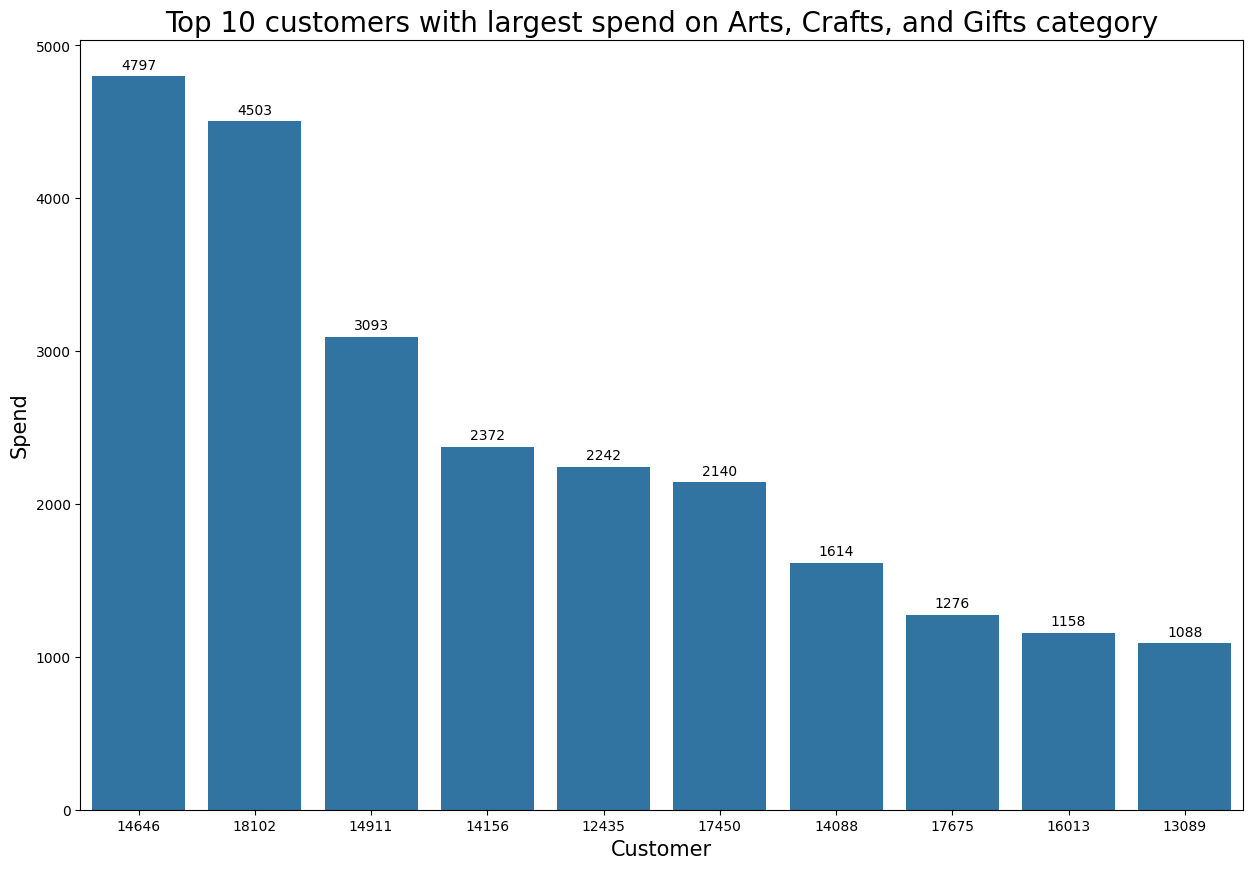

In [18]:
# Visualize top 10 customers with largest spend on Arts, crafts, and gifts category

plt.figure(figsize = [15, 10])
base_color = sns.color_palette()[0]

ax = sns.barplot(x=cust_arts_crafts_gifts.index, y=cust_arts_crafts_gifts.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # fmt annotates bar plots with labels without scientific notation
ax.ticklabel_format(style='plain', axis="y") # plain turns off scientific notation

plt.title('Top 10 customers with largest spend on Arts, Crafts, and Gifts category', size = 20)
plt.xlabel('Customer', size = 15)
plt.ylabel('Spend', size = 15)

plt.show;

### Popularity per Category

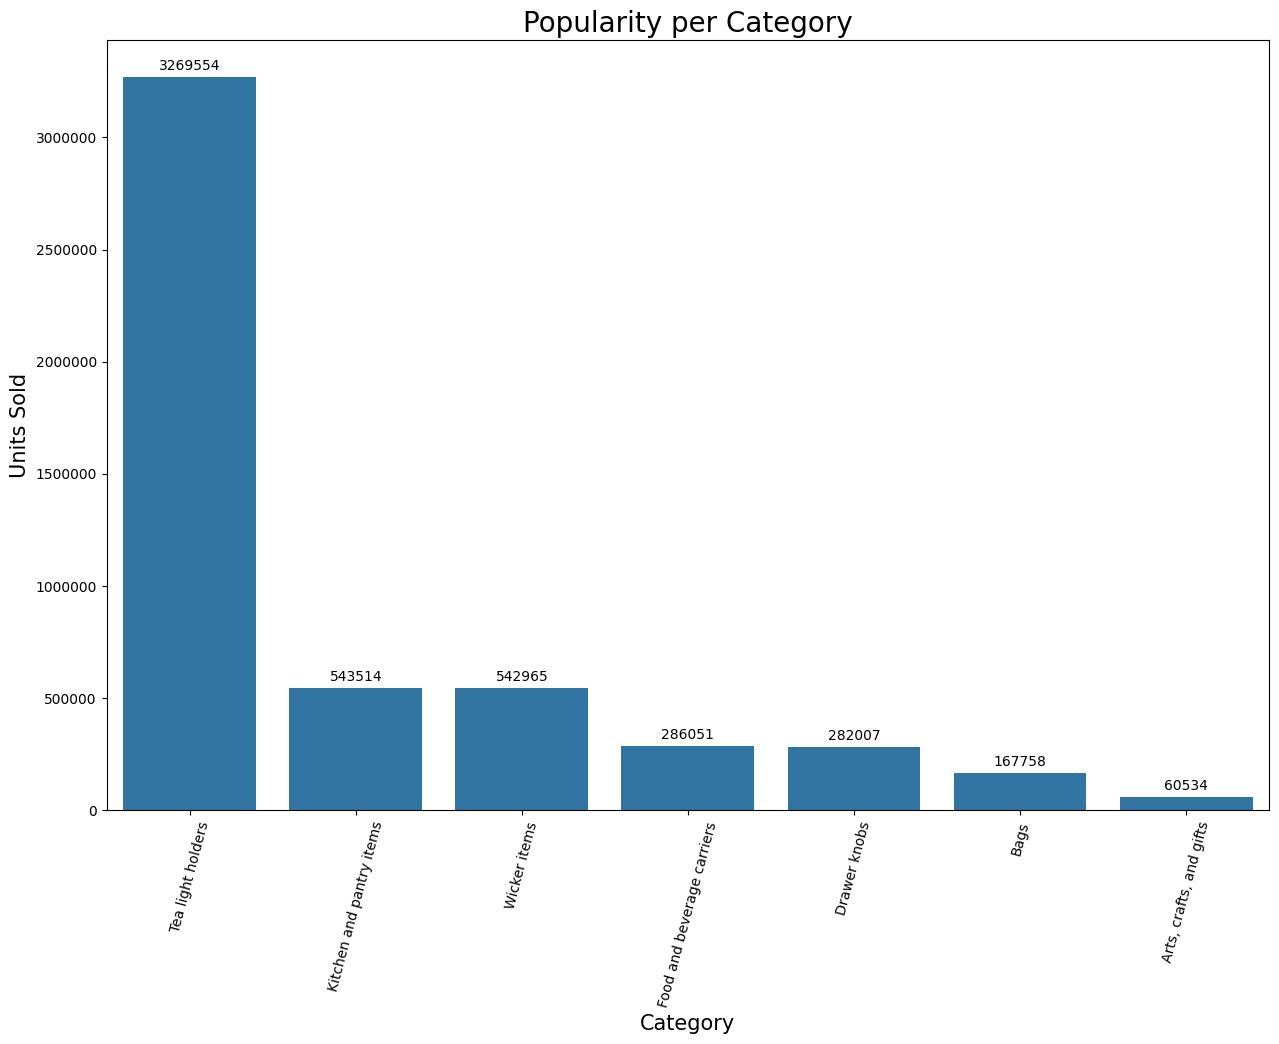

In [19]:
# Popularity per category

popularity_cat = sales_category.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize = [15, 10])
base_color = sns.color_palette()[0]

ax = sns.barplot(x=popularity_cat.index, y=popularity_cat.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # fmt annotates bar plots with labels without scientific notation
ax.ticklabel_format(style='plain', axis="y") # plain turns off scientific notation

plt.title('Popularity per Category', size = 20)
plt.xlabel('Category', size = 15)
plt.ylabel('Units Sold', size = 15)

plt.xticks(rotation = 75)
plt.show;

### Monthly Sales per Category

In [20]:
# Monthly sales per category

monthy_sales_cat = sales_category.groupby(['Period', 'Category'])['LineTotal'].sum().reset_index()
monthy_sales_cat

,Period,Category,LineTotal
0,2018-11,"Arts, crafts, and gifts",1946.23
1,2018-11,Bags,2557.30
2,2018-11,Drawer knobs,5066.44
3,2018-11,Food and beverage carriers,2721.10
4,2018-11,Kitchen and pantry items,9684.30
...,...,...,...
93,2019-12,Drawer knobs,19279.30
94,2019-12,Food and beverage carriers,12812.57
95,2019-12,Kitchen and pantry items,24120.20
96,2019-12,Tea light holders,232722.89


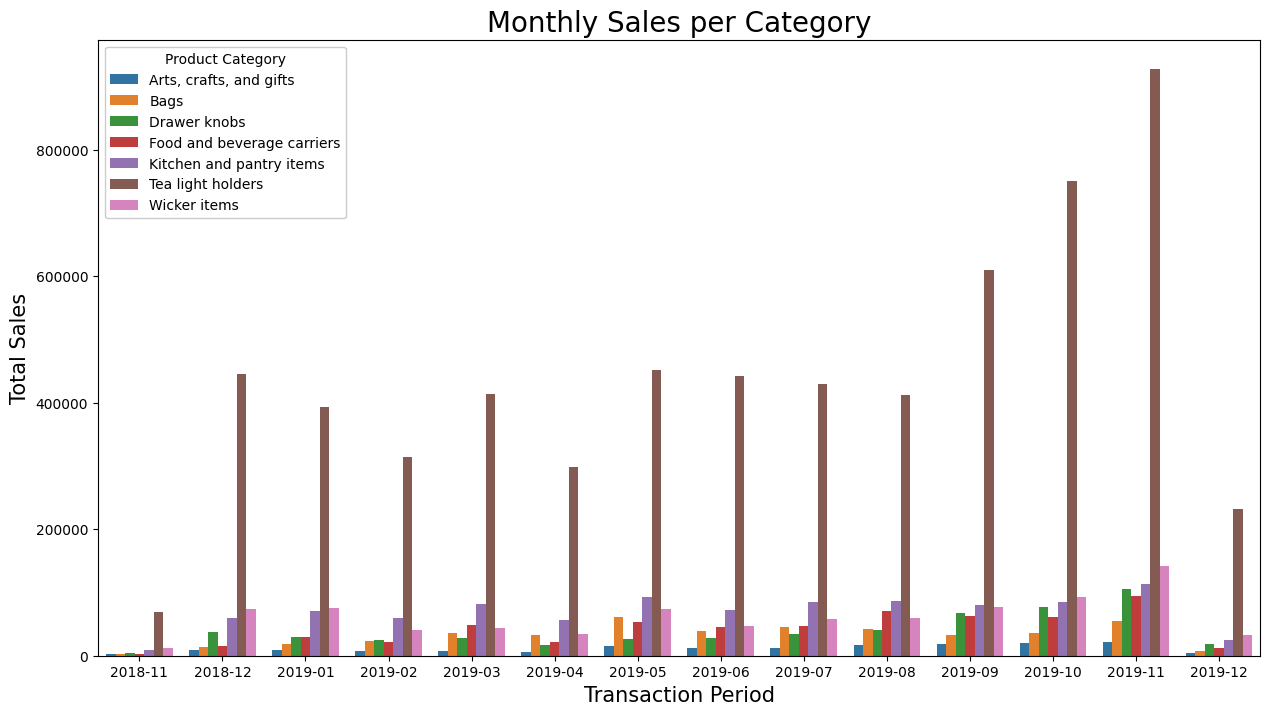

In [21]:
# Visualize monthly sales per category

plt.figure(figsize = [15, 8])
ax = sns.barplot(data= monthy_sales_cat, x = 'Period', y = 'LineTotal', 
               hue = 'Category', errwidth=0)
plt.title('Monthly Sales per Category', size=20)
plt.xlabel('Transaction Period', size=15)
plt.ylabel('Total Sales', size=15)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
ax.ticklabel_format(style='plain', axis="y") # plain turns off scientific notation
plt.show();

### Monthly Units Sold per Category

In [22]:
# Monthly units sold per category

monthy_qty_cat = sales_category.groupby(['Period', 'Category'])['Quantity'].sum().reset_index()
monthy_qty_cat

,Period,Category,Quantity
0,2018-11,"Arts, crafts, and gifts",579
1,2018-11,Bags,840
2,2018-11,Drawer knobs,2561
3,2018-11,Food and beverage carriers,1508
4,2018-11,Kitchen and pantry items,6457
...,...,...,...
93,2019-12,Drawer knobs,9380
94,2019-12,Food and beverage carriers,5887
95,2019-12,Kitchen and pantry items,12366
96,2019-12,Tea light holders,116760


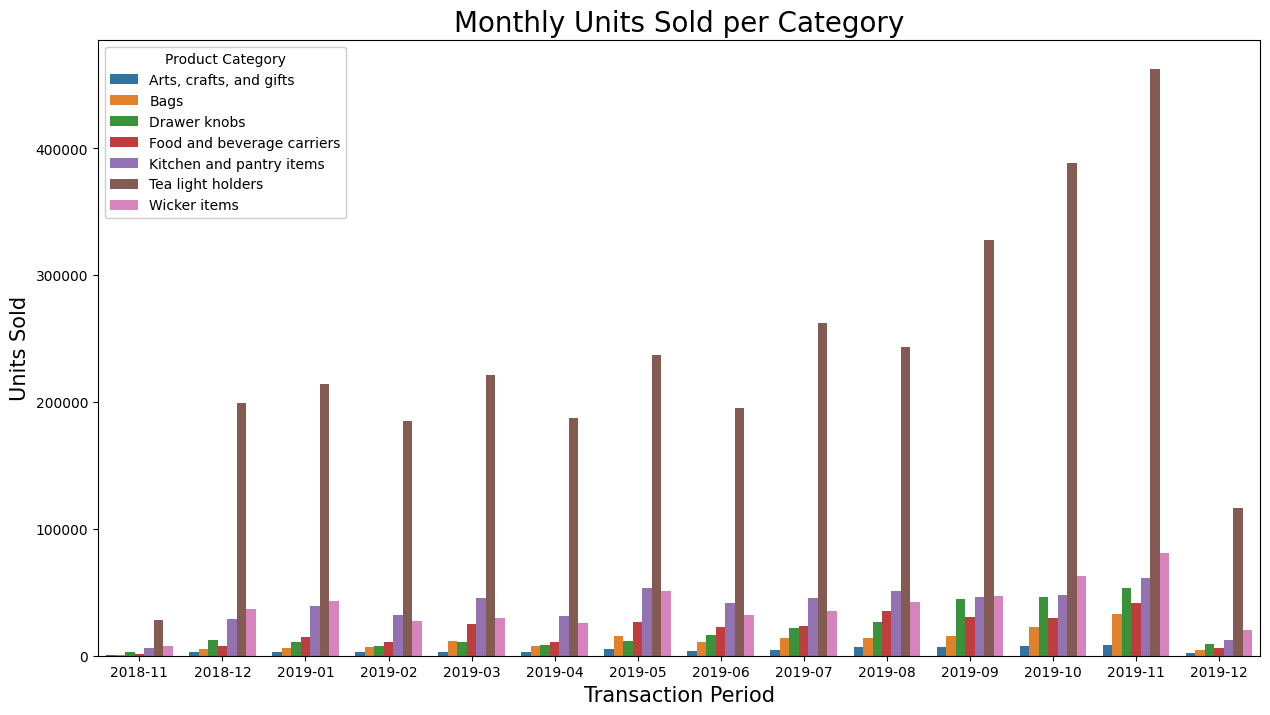

In [23]:
# Visualize monthly sales per category

plt.figure(figsize = [15, 8])
ax = sns.barplot(data= monthy_qty_cat, x = 'Period', y = 'Quantity', 
               hue = 'Category', errwidth=0)
plt.title('Monthly Units Sold per Category', size=20)
plt.xlabel('Transaction Period', size=15)
plt.ylabel('Units Sold', size=15)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
#ax.ticklabel_format(style='plain', axis="y") # plain turns off scientific notation
plt.show();

### Which Day of the Week has the Highest Sales per Category?

In [24]:
# Day of the week sales per category

sales_weekday_cat = sales_category.groupby(['Day', 'Category'])['LineTotal'].sum().reset_index()
sales_weekday_cat

,Day,Category,LineTotal
0,Friday,"Arts, crafts, and gifts",41264.01
1,Friday,Bags,91138.53
2,Friday,Drawer knobs,115393.77
3,Friday,Food and beverage carriers,130601.79
4,Friday,Kitchen and pantry items,193809.29
5,Friday,Tea light holders,1324688.20
6,Friday,Wicker items,183553.26
7,Monday,"Arts, crafts, and gifts",17959.65
8,Monday,Bags,37302.69
9,Monday,Drawer knobs,44337.38


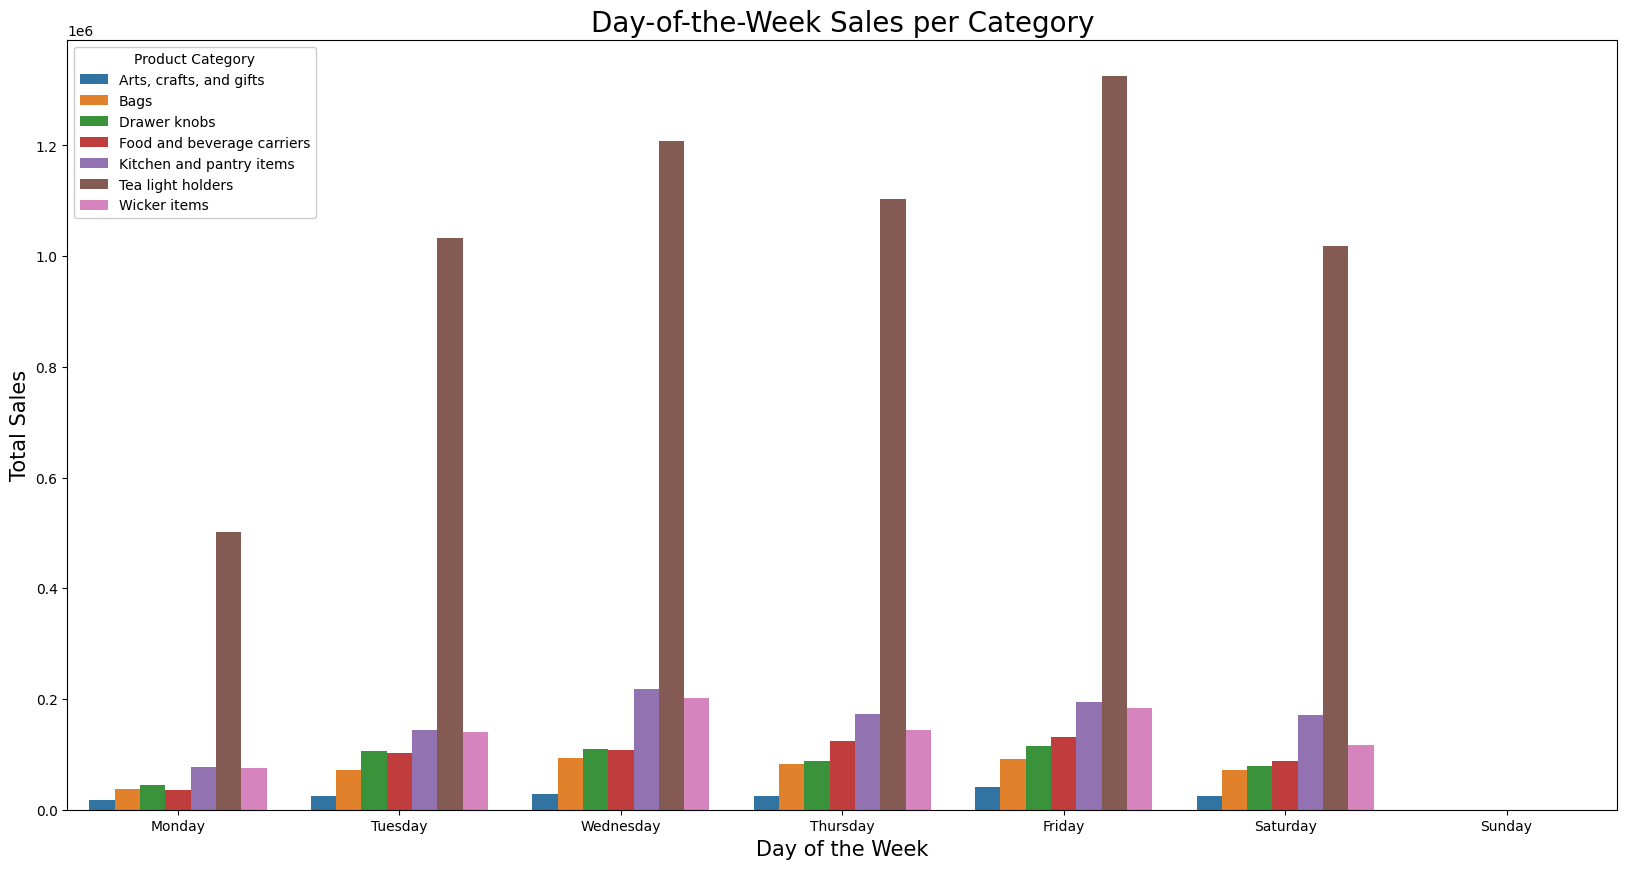

In [25]:
# Visualize day of the week sales per category

plt.figure(figsize = [20, 10])
cat_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(data= sales_weekday_cat, x = 'Day', y = 'LineTotal', 
               hue = 'Category', errwidth=0, order = cat_order)
plt.title('Day-of-the-Week Sales per Category', size=20)
plt.xlabel('Day of the Week', size=15)
plt.ylabel('Total Sales', size=15)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Product Category')
plt.show();

### Number of Unique Products per Category

In [26]:
# Unique products per category

prod_per_cat = sales_category.groupby(['Category'])['Description'].nunique()
prod_per_cat

Category
Arts, crafts, and gifts         75
Bags                            58
Drawer knobs                   210
Food and beverage carriers      29
Kitchen and pantry items       128
Tea light holders             3423
Wicker items                   276
Name: Description, dtype: int64

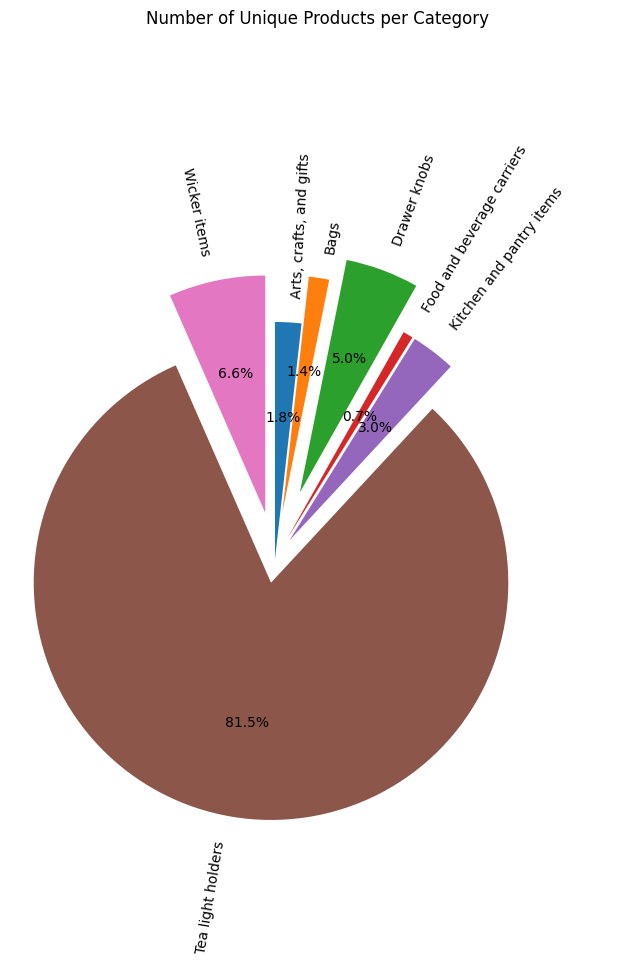

In [27]:
# Visualize unique products per category

prod_per_cat.plot(kind='pie', labels=prod_per_cat.index, autopct='%1.1f%%', figsize=(15,8), startangle=90, counterclock=False,
                 explode=[0, 0.2, 0.3, 0.1, 0.1, 0.1, 0.2], rotatelabels = True)

plt.axis('square')
plt.title('Number of Unique Products per Category', pad=150)
plt.ylabel('');